### CNN实现手写数字识别

In [2]:
#数据集处理
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [4]:
from keras import layers
from keras import models

#搭建卷积神经网络
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation = 'relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation = 'relu'))

#添加分类器
model.add(layers.Flatten())
model.add(layers.Dense(64,activation = 'relu'))
model.add(layers.Dense(10,activation = 'softmax'))

In [5]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
60000/60000 [==============================] - 42s 699us/step - loss: 0.1722 - accuracy: 0.9458
Epoch 2/5
60000/60000 [==============================] - 40s 670us/step - loss: 0.0458 - accuracy: 0.9855
Epoch 3/5
60000/60000 [==============================] - 41s 676us/step - loss: 0.0326 - accuracy: 0.9899
Epoch 4/5
60000/60000 [==============================] - 41s 684us/step - loss: 0.0246 - accuracy: 0.9924
Epoch 5/5
60000/60000 [==============================] - 42s 699us/step - loss: 0.0188 - accuracy: 0.9942


In [6]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

10000/10000 [==============================] - 3s 331us/step
0.9918000102043152


### 基准CNN模型和数据增强模型

#### 基准模型

In [7]:
import os

In [8]:
base_dir = 'D:/2021-2022学年第一、二学期文件汇总/第二学期文件/深度学习与应用实践/数据集/cats_and_dogs_small'  #根目录

In [9]:
train_dir = os.path.join(base_dir, 'train')  #训练集根目录
train_cats_dir = os.path.join(train_dir, 'cats')  #猫图像的训练集目录
train_dogs_dir = os.path.join(train_dir, 'dogs')  #狗图像的训练集目录

validation_dir = os.path.join(base_dir, 'validation')  #验证集根目录
validation_cats_dir = os.path.join(validation_dir, 'cats')  #猫图像的验证集目录
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  #狗图像的验证集目录

test_dir = os.path.join(base_dir, 'test')  #测试集根目录
test_cats_dir = os.path.join(test_dir, 'cats')  #猫图像的测试集目录
test_dogs_dir = os.path.join(test_dir, 'dogs')  #狗图像的测试集目录

In [10]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [11]:
#图片预处理
from keras.preprocessing.image import ImageDataGenerator

#将所有图像的像素乘以 1/255 缩放
train_datagen = ImageDataGenerator(rescale=1./255)  #设置训练集缩放方式
validation_datagen = ImageDataGenerator(rescale=1./255)  #设置验证集缩放方式

train_generator = train_datagen.flow_from_directory(  #训练集生成器
        train_dir,   #图片文件夹
        target_size=(150, 150),  #图像调整为150*150
        batch_size=20,    #每批20个图像
        class_mode='binary')  #因为使用了binary_crossentropy损失，所以需要用二进制标签）

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [12]:
from keras import layers
from keras import models

#构建模型
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [13]:
from keras import optimizers

model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

In [14]:
#训练模型
history = model.fit_generator(
      train_generator,      #训练集数据来源
      steps_per_epoch=100,  #训练集数据抽取次数=2000/20
      epochs=20,            #训练轮次
      validation_data=validation_generator,  #验证集数据来源
      validation_steps=50)  #验证集数据抽取次数=1000/20

Epoch 1/20
100/100 [==============================] - 91s 912ms/step - loss: 0.6831 - acc: 0.5575 - val_loss: 0.7081 - val_acc: 0.6260
Epoch 2/20
100/100 [==============================] - 87s 866ms/step - loss: 0.6456 - acc: 0.6435 - val_loss: 0.7247 - val_acc: 0.6260
Epoch 3/20
100/100 [==============================] - 87s 871ms/step - loss: 0.5919 - acc: 0.6855 - val_loss: 0.5992 - val_acc: 0.6480
Epoch 4/20
100/100 [==============================] - 87s 870ms/step - loss: 0.5543 - acc: 0.7190 - val_loss: 0.5727 - val_acc: 0.6440
Epoch 5/20
100/100 [==============================] - 86s 863ms/step - loss: 0.5338 - acc: 0.7335 - val_loss: 0.5831 - val_acc: 0.6800
Epoch 6/20
100/100 [==============================] - 85s 853ms/step - loss: 0.4998 - acc: 0.7510 - val_loss: 0.5238 - val_acc: 0.7000
Epoch 7/20
100/100 [==============================] - 86s 857ms/step - loss: 0.4835 - acc: 0.7520 - val_loss: 0.6623 - val_acc: 0.7040
Epoch 8/20
100/100 [==============================] - 8

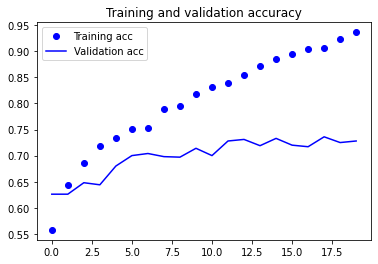

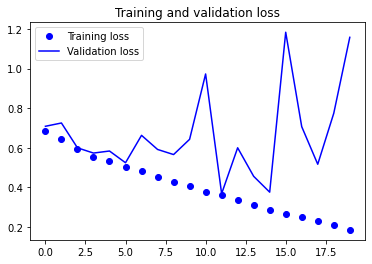

In [15]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### 数据增强

In [ ]:
#构建模型
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))  #增加Dropout层
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

#编译模型
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

In [ ]:
#数据增强生成器，随机变换产生增强图像，只能对训练集增强
train_datagen = ImageDataGenerator(
    rescale=1./255,         #数值缩放因子为 1./255
    rotation_range=40,      #图像随机旋转的角度范围 (0-180)
    width_shift_range=0.2,  #图像在水平方向上平移的范围(相对于总宽度的比例）
    height_shift_range=0.2, #图像在垂直方向上平移的范围(相对于总高度的比例）
    shear_range=0.2,        #图像随机错切变换的角度
    zoom_range=0.2,         #图像随机缩放的范围
    horizontal_flip=True,  #随机将一半图像水平翻转
    fill_mode='nearest')    #用于填充新创建像素的方法

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,  #每批32个图像
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

In [ ]:
#训练模型
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### 作业:  CNN模型训练 CIFAR10 图像集

In [30]:
from keras.datasets import cifar10
(x_train , y_train), (x_test , y_test) = cifar10.load_data()

In [32]:
#数据集预处理
from keras.utils import to_categorical
x_train = x_train / 255
x_test = x_test / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [34]:
from keras import layers
from keras import models

#搭建卷积神经网络
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation = 'relu',input_shape=(32,32,3)))
model.add(layers.Conv2D(64,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(64,(3,3),activation = 'relu'))
model.add(layers.Conv2D(128,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Dropout(0.5))

#添加分类器
model.add(layers.Flatten())
model.add(layers.Dense(512,activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10,activation = 'softmax'))

In [35]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, batch_size=64)

Epoch 1/5
50000/50000 [==============================] - 132s 3ms/step - loss: 1.6115 - accuracy: 0.4004
Epoch 2/5
50000/50000 [==============================] - 131s 3ms/step - loss: 1.2219 - accuracy: 0.5614
Epoch 3/5
50000/50000 [==============================] - 133s 3ms/step - loss: 1.0717 - accuracy: 0.6205
Epoch 4/5
50000/50000 [==============================] - 136s 3ms/step - loss: 0.9705 - accuracy: 0.6578
Epoch 5/5
50000/50000 [==============================] - 133s 3ms/step - loss: 0.9041 - accuracy: 0.6833


In [36]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(test_acc)

10000/10000 [==============================] - 8s 782us/step
0.6970000267028809
